# Supervised Learning with Python

In [4]:
from sklearn import datasets

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

I'll use _iris_ dataset in this Notebook.

## Exploring the Data

In [10]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


The dataset is seperated into two parts.
1. Independent variables (or features)
2. Response variable (or target)

In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

Iris dataset consists of 4 independent variables.

In [6]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

The response variable has three levels: 'setosa', 'versicolor', and 'virginica'.

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


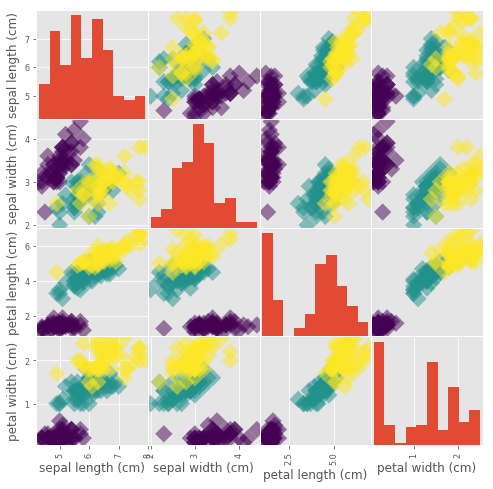

In [9]:
plt.style.use('ggplot') # With `ggplot` we can get better graphs.

pd.plotting.scatter_matrix(df, c = iris.target, figsize = [8, 8], s = 150, marker = 'D')
plt.show()

Scatter plot of the petal_length and the petal_width with _seaborn_. 

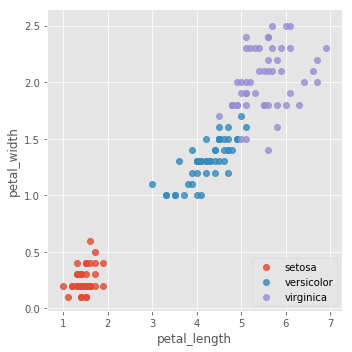

In [10]:
import seaborn as sns
df_iris = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="petal_length", y="petal_width", data=df_iris, fit_reg=False, hue='species', legend=False)
 
# Move the legend to the lower right
plt.legend(loc='lower right')
 
#sns.plt.show()


I'd like to investigate the data in R as well :)

In [1]:
%load_ext rpy2.ipython 

In [11]:
%%R

data(iris)
head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


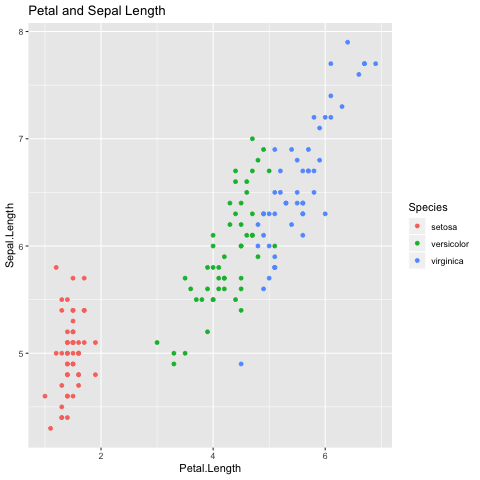

In [14]:
%%R

library('ggplot2')
ggplot(iris, aes(x = Petal.Length, y = Sepal.Length, colour = Species)) + 
  geom_point() +
  ggtitle('Petal and Sepal Length')

## Classification

###  _k-Nearest Neighbors_

Feature and target variable arrays are required for scikit-learn.

In [16]:
X = iris.data
y = iris.target

It is important to split data into training and test sets! `.train_test_split` splits arrays or matrices into random train and test subsets. Default `test_size` is 0.25. `random_state` is the seed used by the random number generator.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

Fitting a k-NN classifier to the training data:

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Computing the accuracy:

In [51]:
y_pred = knn.predict(X_test)

print("Predictions:\n {}".format(y_pred))

Predictions:
 [0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 1 1 0 2 0]


In [52]:
knn.score(X_test, y_test)

0.9666666666666667

`n_neighbors=7` might not be the best value to choose. Let's look at the other options.

In [53]:
n = 10
num_neighbors = np.arange(1, n)
test_acc = np.empty(len(num_neighbors))

for i, k in enumerate(num_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

Text(0,0.5,'Accuracy')

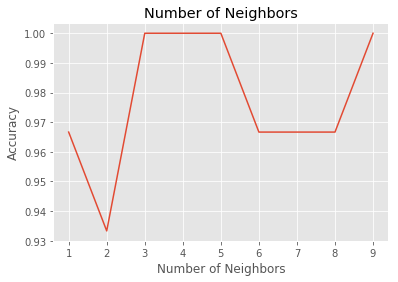

In [54]:
plt.title('Number of Neighbors')
plt.plot(num_neighbors, test_acc)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')


## Regression

In this section, we'll be investigating the Gapminder dataset.

In [12]:
df = pd.read_csv("datasets/gapminder.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [13]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [14]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


`df.corr()` gives us teh pairwise correlation between variables.

In [19]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


Text(0.5,1,'Pairwise Correlation Between Variables')

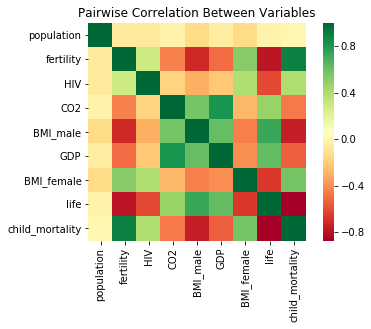

In [25]:
import seaborn as sns

sns.heatmap(df.corr(), square=True, cmap='RdYlGn').set_title('Pairwise Correlation Between Variables')